### 회귀
- 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- Y = W1*X1 + W2*X2+ W3*X3 + ...
- 머신러닝 회귀 예측의 핵심 : 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것
- 1개 : 단일 회귀, 여러 개 : 다중 회귀, 선형 : 선형 회귀, 비선형 : 비선형 회귀
- 지도학습 : 회귀 / 분류
  - 일반 선형 회귀 : 예측값과 실제 값의 잔차 제곱합을 최소화할 수 있도록 회귀 계수를 최적화, 규제를 적용하지 않은 모델
  - 릿지: 선형 회귀에 L2 규제(상대적으로 큰 회귀 계수값의 예측 영향도를 감소시키기 위해 회귀 계수 값을 더 작게 만드는 규제 모델)를 추가한 회귀 모델
  - 라쏘: 선형 회귀에 L1 규제(예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것)를 적용한 회귀 모델
  - 엘라스틱넷: L2, L1 규제를 함께 결합한 모델, L1 규체로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기 조정
  - 로지스틱 회귀 : 분류에 사용되는 선형 모델

### 단순 선형 회귀를 통한 회귀 이해
- 실제 값과 회귀 모델의 차이에 따른 오류 값을 **잔차**라고 부름
- 최적의 회귀 모델을 만든다=전체 데이터의 잔차합이 최소가 되는 모델을 만들고 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다.
- **RSS** : 비용 함수 (or 손실 함수)

### 비용 최소화하기 - **경사 하강법**
- 경사 하강법 : 점진적인 반복 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 w 파라미터를 구하는 방식
- 오류를 감소시키는 방향으로 w를 계속 업데이트하다가 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 w값을 최적 파라미터로 반환

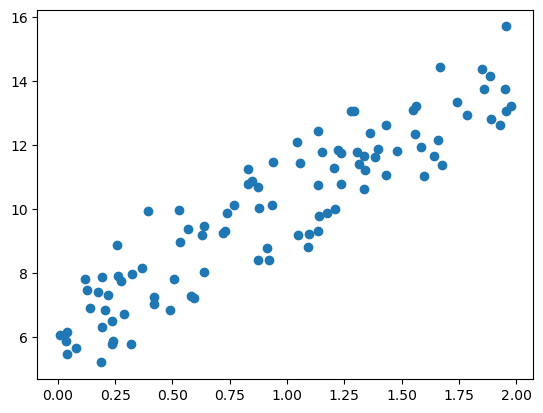

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x+6을 근사(w1 = 4, w0 = 6), 임의의 값은 노이즈를 위해 만듦
X = 2* np.random.rand(100,1)
y = 6+4*X + np.random.randn(100,1)

# x,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [6]:
# 비용 함수 정의
def get_cost(y, y_pred) :
   N = len(y)
   cost = np.sum(np.square(y-y_pred))/N
   return cost

In [11]:
# w1을 w0를 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01) :
    N=len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape를 동일한 크기를 가진 0으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    # w0 update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    # w1과 w0을 업데이트할 w1_update와 w0_update를 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    return w1_update, w0_update

In [1]:
# 경사 하강 방식으로 반복 수행하여 w1, w0을 업데이트 적용
def gradient_descent_steps(X,y,iters=10000) :
    # w0과 w1를 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업뎃 수행
    for ind in range(iters) :
        w1_update, w0_update = get_weight_updates(w1, w0, X,y, learning_rate = 0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
    return w1, w0

In [25]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


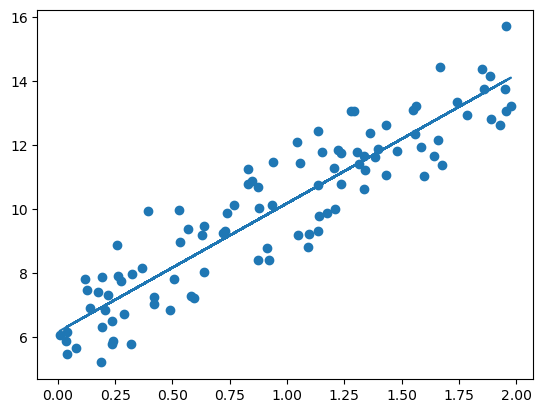

In [26]:
plt.scatter(X,y)
plt.plot(X, y_pred)

In [33]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  pred_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X, y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size 만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [34]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


### 사이킷런 linearRegression을 이용한 보스턴 주택 가격 예측

#### LinearRegression 클래스 - Ordinary Least Square
- fit_intercept : 불린, 절편 값을 계산할 것인지 말지
- normalize : 입력 데이터 세트를 정규화
- coef : fit() 메서드 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성
- intercept : intercept 값

#### 회귀 평가 지표
- MAE, MSE, RMSE, R2 등

### 다항 회귀와 과(대) 적합 / 과소적합 이해
- 다항 회귀 : 독립변수의 단항식이 아닌 2,3차 방정식과 같은 다항식으로 표현
- 비선형 회귀라고 혼동x

### 편향 - 분산 트레이드 오프
- 편향과 분산이 서로 트레이드오프를 이루면서 오류 cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법

class sklearn.linear_model.LinearRegression(fit_intercept=True, 
                                           normalize = False, copy_X = True, n_jobs = 1)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

In [37]:
# boston 데이터 세트 로드
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

C:\Users\gyw78\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\gyw78\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [40]:
bostonDF['CHAS']=bostonDF['CHAS'].astype(np.float64)
bostonDF['RAD']=bostonDF['RAD'].astype(np.float64)

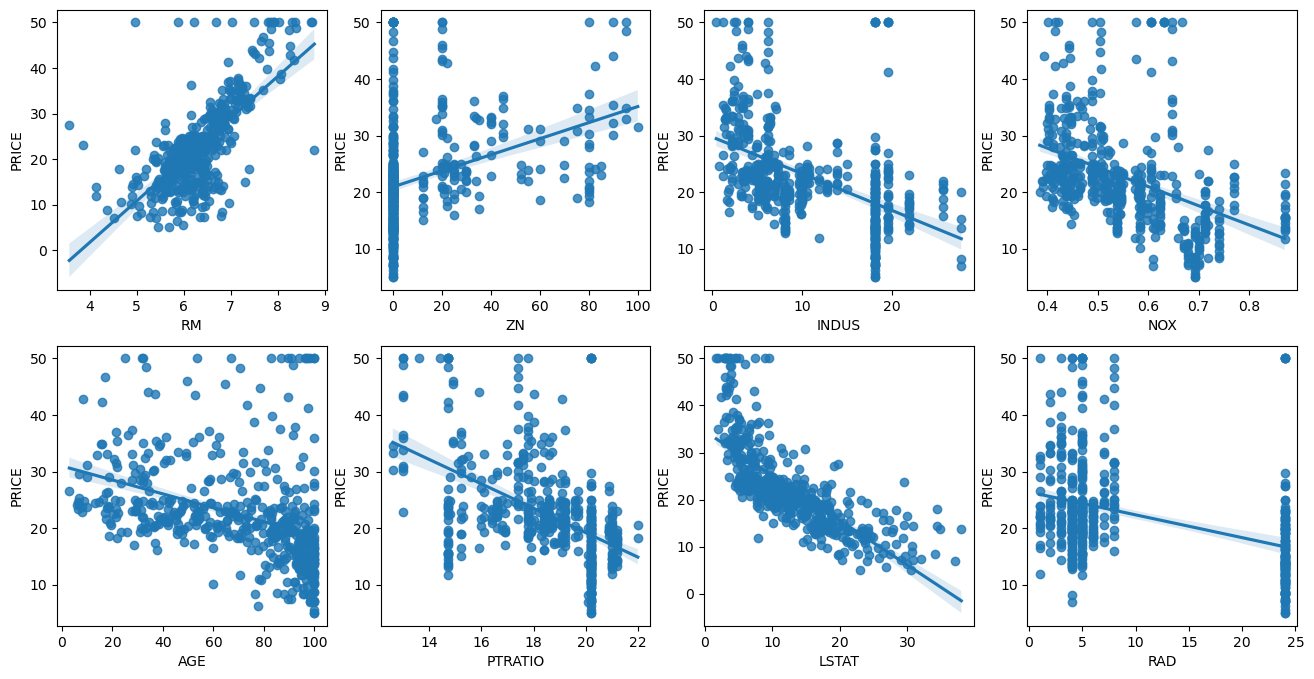

In [41]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state=156)


In [43]:
# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [44]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,1))

절편 값: 40.99559517216419
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [45]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [46]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
def  polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)
# cross_val_score(scoring='neg_mean_squared_error)로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


In [47]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [48]:
def  polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [49]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def  polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [52]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.043208749872317626 입니다.

Degree 15 회귀 계수는 [-2.98292000e+03  1.03899180e+05 -1.87415809e+06  2.03715961e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08] 입니다.
Degree 15 MSE 는 182493841.77304456 입니다.


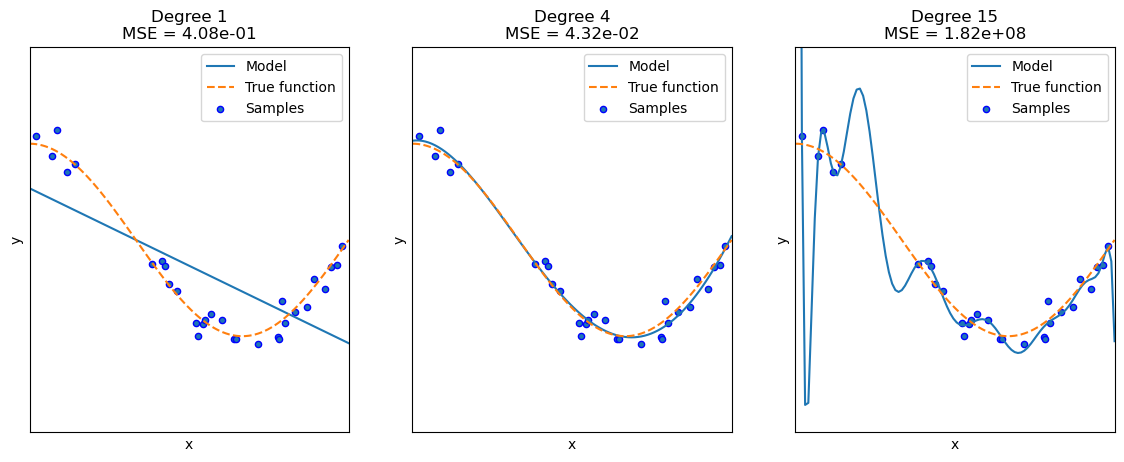

In [53]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i + 1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree 별로 Polynomial 변환
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features', polynomial_features), ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  # 교차 검증으로 다항 회귀를 평가
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring = 'neg_mean_squared_error', cv=10)
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1 * np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
  X_test = np.linspace(0, 1, 100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
  # 실제값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label='True function')
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0,1))
  plt.ylim((-2,2))
  plt.legend(loc='best')
  plt.title('Degree {}\nMSE = {:.2e}'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()